# Финальное задание курса

В итоговом задании курса мы предлагаем вам решить задачу регрессии - по характеристикам поездок на такси в Нью-Йорке научиться определять их стоимость.

В задании две части:

* первая часть - обычная. Так устроены все ноутбуки с домашними заданиями в курсе. Мы что-то просим - вы делаете. Задания этой части как обычно проверяются тестами на Stepik

* вторая часть - творческая. В этой части мы даем вам лишь идеи того, что можно сделать, а все остальное - на вас. Это задание проверяется в виде текстового отчета (подробности смотрите в описании второй части задания)

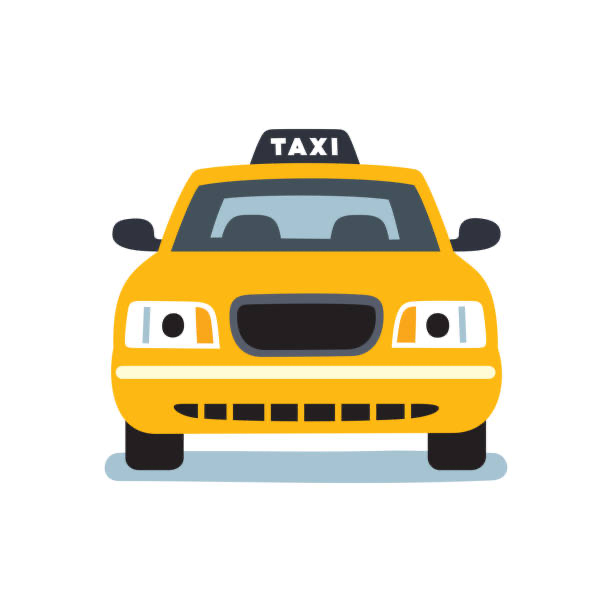

# Часть 1

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

C:\Users\alena\AppData\Local\Temp\ipykernel_14284\3213813731.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Считаем данные

In [3]:
df = pd.read_csv("final_project_data.csv")

df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,2011-11-23 14:36:35.0000003,2011-11-23 14:36:35 UTC,-73.959075,40.783316,-73.959087,40.783345,1.0,2.5
1,2013-09-14 21:40:00.00000016,2013-09-14 21:40:00 UTC,-73.931612,40.771060,-73.929097,40.760542,1.0,5.5
2,2012-04-30 18:13:19.0000002,2012-04-30 18:13:19 UTC,-73.997929,40.740983,-74.007197,40.727725,2.0,6.5
3,2010-10-22 15:03:47.0000001,2010-10-22 15:03:47 UTC,-73.980608,40.742449,-73.985609,40.755807,1.0,6.5
4,2011-02-18 18:08:16.0000002,2011-02-18 18:08:16 UTC,-74.008884,40.720314,-73.983280,40.722350,1.0,12.1


## Исследование данных

### Quiz

Сколько строк в таблице df?

In [4]:
# ваш код здесь
df.shape[0]

615962

### Quiz

Есть ли пропущенные значения в таблице? В скольких столбцах есть пропуски?

In [5]:
# ваш код здесь
df.isna().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      1
dropoff_longitude    3
dropoff_latitude     3
passenger_count      1
fare_amount          1
dtype: int64

### Quiz

Удалите строки с пропущенными значениями из таблицы. Сколько строк осталось в таблице?

In [6]:
# ваш код здесь
df.dropna(inplace=True)
df.shape

(615959, 8)

Удалите из данных колонку `key`, так как в ней дублируется информация из `pickup_datetime`

In [7]:
# ваш код здесь
df.drop('key', axis=1, inplace=True)
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,2011-11-23 14:36:35 UTC,-73.959075,40.783316,-73.959087,40.783345,1.0,2.5
1,2013-09-14 21:40:00 UTC,-73.931612,40.771060,-73.929097,40.760542,1.0,5.5
2,2012-04-30 18:13:19 UTC,-73.997929,40.740983,-74.007197,40.727725,2.0,6.5
3,2010-10-22 15:03:47 UTC,-73.980608,40.742449,-73.985609,40.755807,1.0,6.5
4,2011-02-18 18:08:16 UTC,-74.008884,40.720314,-73.983280,40.722350,1.0,12.1


Обработайте колонку `pickup_datetime`. Выделите из нее 4 новых столбца:

* `year` - год поездки
* `month` - месяц поездки
* `day` - день поездки
* `hour` - час поездки. Час вычисляйте так: если до следующего часа осталось меньше 30 минут (на секунды не смотрим), что час округляете до следующего.

Пример: 14:18:20 -> 14 часов, 17:48:29 -> 18 часов

Затем удалите столбец `pickup_datetime`.



In [8]:
# ваш код здесь
df['year'] = df['pickup_datetime'].str[:4].astype(int)
df['month'] = df['pickup_datetime'].str[5:7].astype(int)
df['day'] = df['pickup_datetime'].str[8:10].astype(int)
df['minute'] = df['pickup_datetime'].str[14:16].astype(int)
df['hour'] = df['pickup_datetime'].str[11:13].astype(int) + (df['minute'] > 30)
df.drop('minute', axis=1, inplace=True)
df.drop('pickup_datetime', axis=1, inplace=True)
df.head(n=20)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,year,month,day,hour
0,-73.959075,40.783316,-73.959087,40.783345,1.0,2.5,2011,11,23,15
1,-73.931612,40.771060,-73.929097,40.760542,1.0,5.5,2013,9,14,22
2,-73.997929,40.740983,-74.007197,40.727725,2.0,6.5,2012,4,30,18
3,-73.980608,40.742449,-73.985609,40.755807,1.0,6.5,2010,10,22,15
4,-74.008884,40.720314,-73.983280,40.722350,1.0,12.1,2011,2,18,18
5,-73.973728,40.791937,-73.960058,40.805453,5.0,5.7,2010,3,10,15
6,-73.954463,40.784145,-73.951115,40.774394,2.0,6.7,2009,1,29,17
7,-73.983125,40.758822,-73.977298,40.784550,1.0,8.5,2012,9,19,10
8,-74.004678,40.741370,-74.005215,40.723019,1.0,7.3,2010,9,1,14
9,-73.958759,40.764176,-73.954370,40.787359,1.0,10.5,2013,10,21,8


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 615959 entries, 0 to 615960
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_longitude   615959 non-null  float64
 1   pickup_latitude    615959 non-null  float64
 2   dropoff_longitude  615959 non-null  float64
 3   dropoff_latitude   615959 non-null  float64
 4   passenger_count    615959 non-null  float64
 5   fare_amount        615959 non-null  float64
 6   year               615959 non-null  int32  
 7   month              615959 non-null  int32  
 8   day                615959 non-null  int32  
 9   hour               615959 non-null  int32  
dtypes: float64(6), int32(4)
memory usage: 42.3 MB


## Вопросы по данным

### Quiz

В какие годы совершались поездки?

In [10]:
# ваш код здесь
df['year'].value_counts()

year
2012    99060
2011    97898
2013    96329
2009    94465
2010    93419
2014    92051
2015    42737
Name: count, dtype: int64

### Quiz

В какой час было совершено больше всего поездок?

In [11]:
# ваш код здесь
df['hour'].value_counts(ascending=False)

hour
19    38614
20    37536
21    35666
22    34962
18    34911
23    32451
15    30996
14    30520
12    30083
13    30003
9     28772
10    27864
11    27821
16    27312
17    26607
8     26038
1     20764
7     17857
2     15608
24    13989
0     13441
3     11345
4      8789
6      8392
5      5618
Name: count, dtype: int64

### Quiz

В какой сезон (зима, весна, лето, осень) было совершено наименьшее число поездок?

In [12]:
# ваш код здесь
summer = df[(df.month>=6) & (df.month<= 8)].shape[0]
autumn = df[(df.month>=9) & (df.month<= 11)].shape[0]
winter = df[(df.month==12) | (df.month<= 2)].shape[0]
spring = df[(df.month>=3) & (df.month<= 5)].shape[0]

In [13]:
print(f'summer = {summer} \nautumn = {autumn} \nwinter = {winter} \nspring = {spring}')

summer = 146371 
autumn = 143373 
winter = 153973 
spring = 172242


In [14]:
seasons = {'summer': summer, 'autumn': autumn, 'winter': winter, 'spring': spring}
res = {key:val for key,val in seasons.items() if val == min(seasons.values())}
print(res)

{'autumn': 143373}


Постройте scatter plot в осях `pickup_latitude` и `pickup_longitude`

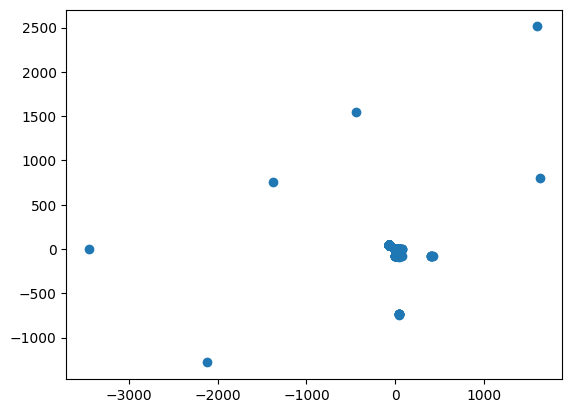

In [15]:
# ваш код здесь
plt.scatter(df['pickup_latitude'], df['pickup_longitude']);

Видим, что есть несколько выбросов, когда такси вызывали в сильно отдаленные пункты

### Quiz

Постройте ящик с усами boxplot для `pickup_longitude`. Есть ли на визуализации выбросы? (отдельные точки)

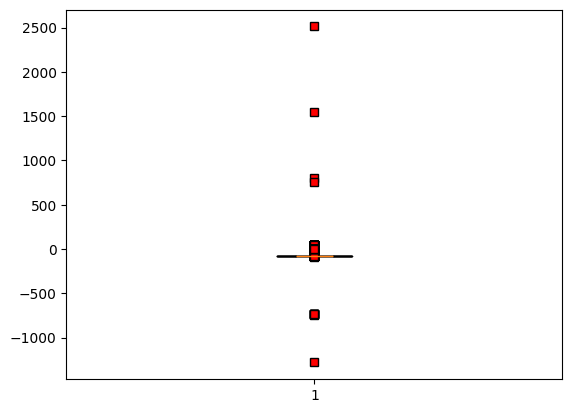

In [16]:
# ваш код здесь
plt.boxplot(df.pickup_longitude,
            notch = True,
            flierprops = dict(marker = "s", markerfacecolor = "red"));

Ящик с усами также подтверждает, что выбросы есть

### Quiz

Чему равна медиана `pickup_longitude`? Ответ округлите до тысячных.

In [17]:
# ваш код здесь
round(df.pickup_longitude.median(), 3)

-73.982

Постройте гистограмму распределения признака `hour`.

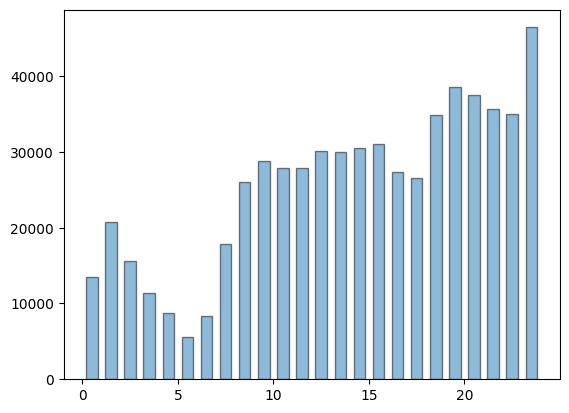

In [18]:
# ваш код здесь
plt.hist(df.hour, bins=24, rwidth=0.6, alpha=0.5, histtype='bar', ec='black');

## Построение baseline-модели

Разбейте `df` на матрицу объект-признак `X` и вектор с целевой переменной `y`. Целевая переменная - столбец `fare_amount`.

In [19]:
# ваш код здесь
y = df.fare_amount
X = df.drop('fare_amount', axis=1, inplace=False)

Разбейте данные на тренировочную и тестовую части с помощью train_test_split.

Тестовая часть - 25% всех данных, `random_state=42`.

Сколько строк в матрице `X_train`?

In [20]:
# ваш код здесь
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
X_train.shape[0]

461969

### Quiz

Обучите решающее дерево глубины 3 на тренировочных данных и вычислите ошибку $R^2$ на тесте. Ответ округлите до сотых.

Зафиксируйте у дерева `random_state=42`.

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# ваш код здесь
model_tree_base = DecisionTreeRegressor(max_depth=3, random_state=42)
model_tree_base.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [23]:
pred = model_tree_base.predict(X_test)
r2_value = r2_score(y_test, pred)
print(round(r2_value, 2))

0.5


### Quiz

Постройте гистограмму важности признаков.

Какой признак имеет наибольший вес?

In [24]:
import seaborn as sns

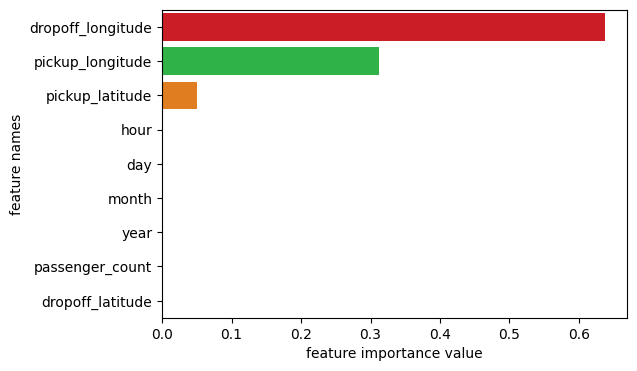

In [25]:
# ваш код здесь
sorted_ind = model_tree_base.feature_importances_.argsort()[::-1]
sorted_feature_names = X.columns[sorted_ind]
sorted_importances = model_tree_base.feature_importances_[sorted_ind]
data = pd.DataFrame(sorted_importances, index=sorted_feature_names, columns=['importance'])

fig = plt.figure(figsize=(6, 4))
plt.xlabel("feature importance value")
plt.ylabel("feature names")

sns.barplot(x=data.importance, y=data.index, data=data, hue=data.importance, legend=False, palette='bright')
plt.show()

## Улучшение модели

### Quiz

Постройте гистограмму распределения целевой переменной `y`, укажите параметр `bins=100`.

Является ли распределение нормальным?

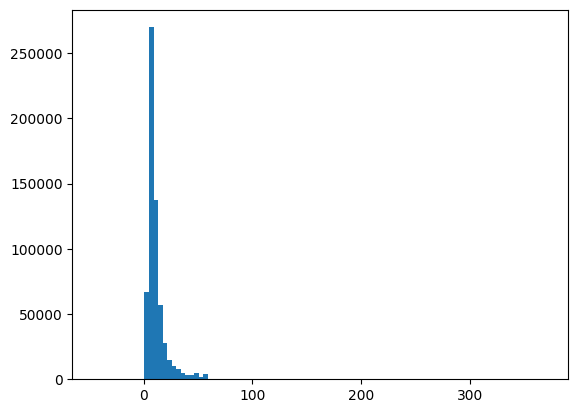

In [26]:
# ваш код здесь

plt.hist(y, bins=100);

Замените все значения $y$, меньшие 0, на 0.

Сделайте преобразование целевой переменной по правилу $y_{new} = np.log1p(y)$

Заново разбейте данные на тренировочную и тестовую часть по тем же правилам, что и раньше, но теперь используйте `X` и `y_new`.

In [27]:
# ваш код здесь
y = np.where(y < 0, 0, y)

y_new = np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.25, random_state=42)

In [28]:
type(y)

numpy.ndarray

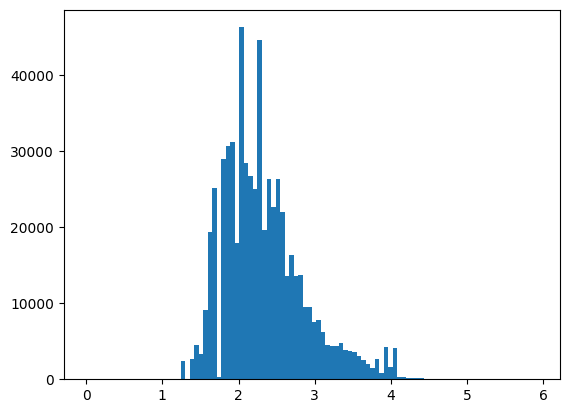

In [29]:
plt.hist(y_new, bins=100);

### Quiz

Заново обучите решающее дерево глубины 3 с `random_state=42` на тренировочных данных и вычислите $R^2$ на тесте. Ответ округлите до сотых.

Перед вычислением $R^2$ сделайте обратное преобразование от прогноза: `np.expm1(pred)` и от `y_test`.

**Важно:** дальше мы будем работать с преобразованной целевой переменной, поэтому при вычислении $R^2$ во всех заданиях ниже делайте обратное преобразование.

In [30]:
# ваш код здесь
model_tree_log = DecisionTreeRegressor(max_depth=3, random_state=42)
model_tree_log.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [31]:
pred = model_tree_log.predict(X_test)
r2_value = r2_score(np.expm1(y_test), np.expm1(pred))
print(round(r2_value, 2))

0.44


### Quiz


Подберите по кросс-валидации на тренировочных данных глубину дерева в диапазоне от 3 до 10 включительно с шагом 1 (`random_state=42`).

`cv=3, scoring=r2`

Затем примените модель с оптимальной глубиной на тесте и вычислите $R^2$. Ответ округлите до сотых.

Перед вычислением $R^2$ не забудьте (как и дальше) делать преобразование `np.expm1`

In [32]:
# ваш код здесь
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : np.arange(3, 11, 1)} 

gs = GridSearchCV(DecisionTreeRegressor(random_state=42), params, cv=3, scoring='r2')

gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

0.5620561878845917
{'max_depth': 10}


In [33]:
model_tree_log_tuned = gs.best_estimator_

In [34]:
pred = model_tree_log_tuned.predict(X_test)
r2_value = r2_score(np.expm1(y_test), np.expm1(pred))
print(round(r2_value, 2))

0.68


## Усложнение пайплайна

Создайте pipeline, в котором сначала извлеките полиномиальные признаки степени 2 из данных, а затем обучите решающее дерево глубины 3 с `random_state=42`.

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

p1 = Pipeline([
    ('features', PolynomialFeatures(degree=2)),
    ('model', DecisionTreeRegressor(max_depth=3, random_state=42))
])

### Quiz

Обучите pipeline на тренировочных данных, сделайте прогноз на тесте и вычислите $R^2$. Ответ округлите до сотых.

In [36]:
# ваш код здесь
p1.fit(X_train, y_train)

Pipeline(steps=[('features', PolynomialFeatures()),
                ('model', DecisionTreeRegressor(max_depth=3, random_state=42))])

In [37]:
pred = p1.predict(X_test)
r2_value = r2_score(np.expm1(y_test), np.expm1(pred))
print(round(r2_value, 2))

0.42


При помощи GridSearchCV с теми же гиперпараметрами, что и раньше, подберите глубину дерева внутри пайплайна в диапазоне от 3 до 10 включительно с шагом 1.

In [38]:
# ваш код здесь
params = {'model__max_depth' : np.arange(3, 11, 1)} 

gs2 = GridSearchCV(p1, params, cv=3, scoring='r2')

gs2.fit(X_train, y_train)

print(gs2.best_score_)
print(gs2.best_params_)

0.6658660525943468
{'model__max_depth': 10}


### Quiz

Выведите $R^2$ лучшего результата на тесте. Ответ округлите до сотых.

In [39]:
# ваш код здесь
model_pipeline_tuned = gs2.best_estimator_

pred = model_pipeline_tuned.predict(X_test)
r2_value = r2_score(np.expm1(y_test), np.expm1(pred))
print(round(r2_value, 2))

0.71


## Feature selection

Добавьте в предыдущий пайплайн:
* после добавления полиномиальных признаков - StandardScaler
* затем - снижение размерности при помощи метода `SelectFromModel` с моделью `Ridge` с гиперпараметрами по умолчанию.

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, Ridge

# ваш код здесь
p2 = Pipeline([
    ('features', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('selector', SelectFromModel(Ridge())),
    ('model', DecisionTreeRegressor(max_depth=3, random_state=42))
])

Обучите пайплайн на тренировочных данных, сделайте прогноз на тесте и вычислите для него $R^2$.

In [41]:
# ваш код здесь
p2.fit(X_train, y_train)

Pipeline(steps=[('features', PolynomialFeatures()),
                ('scaler', StandardScaler()),
                ('selector', SelectFromModel(estimator=Ridge())),
                ('model', DecisionTreeRegressor(max_depth=3, random_state=42))])

In [42]:
pred = p2.predict(X_test)
r2_value = r2_score(np.expm1(y_test), np.expm1(pred))
print(round(r2_value, 2))

0.41


Подберите глубину решающего дерева в пайплайне, в том же диапазоне и теми же гиперпараметрами GridSearch, что и в предыдущих заданиях.

Вычислите $R^2$ на тестовых данных, ответ округлите до сотых.

In [43]:
# ваш код здесь
params = {'model__max_depth' : np.arange(3, 11, 1)} 

gs3 = GridSearchCV(p2, params, cv=3, scoring='r2')

gs3.fit(X_train, y_train)

print(gs3.best_score_)
print(gs3.best_params_)

0.604686796959352
{'model__max_depth': 10}


In [44]:
# ваш код здесь
model_pipeline_tuned_with_selector = gs3.best_estimator_

pred = model_pipeline_tuned_with_selector.predict(X_test)
r2_value = r2_score(np.expm1(y_test), np.expm1(pred))
print(round(r2_value, 2))

0.67


### Quiz

Удалось ли при помощи пайплайна с отбором признаков улучшить результат предыдущей лучшей модели?

## Кодирование категориальных признаков

Признаки `month`, `day`, `hour` - категориальные (подумайте почему!)

Поэтому их можно попробовать закодировать.

Попробуем подход: группировка значений признака + дальнейшая OneHot-кодировка.

* Создайте колонки `winter`, `spring`, `summer`, `autumn` - в каждую из которых пишите 1, если месяц относится к сезону, и 0 иначе.

* Создайте колонки `start_month`, `middle_month`, `end_month` - в каждую колонку пишите 1, если день относится к началу месяца (1-10 число), середине месяца (11-20 число), концу месяца (от 21 числа), и 0 иначе.

* Создайте колонки `night`, `morning`, `day`, `evening` по аналогии. Если час - от 23 до 5, то это `night`, от 6 до 11 - `morning`, от 12 до 16 - `day`, от 17 до 22 - `evening`.

После создания новых колонок удалите колонки `month`, `day`, `hour`.

P.S. Отдельно делайте преобразования для X_train и для X_test, чтобы заново не разбивать данные.

In [45]:
feature_count_1 = X_train.shape[1]

In [46]:
# ваш код здесь
def preprocessing(XX):
    '''
    Function for encoding of feature matrixes
    '''
    
    XX['winter'] = np.where((XX.month==12) | (XX.month<=2), 1, 0)
    XX['spring'] = np.where((XX.month>=3) & (XX.month<=5), 1, 0)
    XX['summer'] = np.where((XX.month>=6) & (XX.month<=8), 1, 0)
    XX['autumn'] = np.where((XX.month>=9) & (XX.month<=11), 1, 0)
    XX['start_month'] = np.where((XX.day>=1) & (XX.day<=10), 1, 0)
    XX['middle_month'] = np.where((XX.day>=11) & (XX.day<=20), 1, 0)
    XX['end_month'] = np.where((XX.day>=21), 1, 0)
    XX['night'] = np.where((XX.hour>=23) | (XX.hour<=5), 1, 0)
    XX['morning'] = np.where((XX.hour>=6) & (XX.hour<=11), 1, 0)
    XX['day_t'] = np.where((XX.hour>=12) & (XX.hour<=16), 1, 0)
    XX['evening'] = np.where((XX.hour>=17) & (XX.hour<=22), 1, 0)    
    XX.drop(['month', 'day', 'hour'], axis=1, inplace=True)

    return XX

In [47]:
X_train = preprocessing(X_train)
X_test = preprocessing(X_test)

In [48]:
X_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,winter,spring,summer,autumn,start_month,middle_month,end_month,night,morning,day_t,evening
537483,-73.984460,40.720162,-73.984322,40.731110,1.0,2011,0,0,0,1,1,0,0,0,0,0,1
543146,-73.937375,40.804540,-73.960572,40.807480,2.0,2013,0,1,0,0,0,1,0,0,0,0,1
575883,-73.925792,40.744198,-73.918459,40.765595,1.0,2010,1,0,0,0,0,0,1,0,1,0,0
66928,-74.003342,40.722141,-74.015869,40.715488,5.0,2015,1,0,0,0,0,1,0,0,1,0,0
164891,-73.991783,40.749656,-73.979164,40.740610,1.0,2011,0,0,0,1,0,0,1,0,0,1,0


In [49]:
feature_count_2 = X_train.shape[1]

### Quiz

На сколько признаков стало больше в матрице-объект признак после добавления закодированных категориальных столбцов и удаления исходных категориальных столбцов?

In [50]:
print(feature_count_2 - feature_count_1)

8


Подберите при помощи GridSearch с теми же гиперпараметрами, что и выше, оптимальную глубину дерева в диапазоне от 3 до 10 включительно (с шагом 1). У дерева `random_state=42`.

In [51]:
# ваш код здесь
params = {'max_depth' : np.arange(3, 11, 1)} 

gs4 = GridSearchCV(DecisionTreeRegressor(random_state=42), params, cv=3, scoring='r2')

gs4.fit(X_train, y_train)

print(gs4.best_score_)
print(gs4.best_params_)

0.562637780119338
{'max_depth': 10}


Постройте гистограмму важности признаков для полученной модели (лучшей по GridSearch).

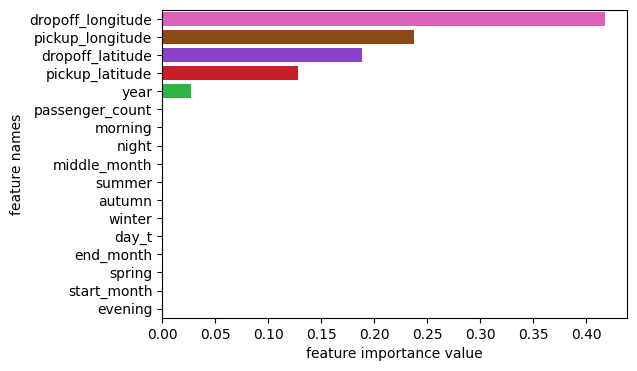

In [52]:
# ваш код здесь
model_encoded = gs4.best_estimator_

sorted_ind = model_encoded.feature_importances_.argsort()[::-1]
sorted_feature_names = X_train.columns[sorted_ind]
sorted_importances = model_encoded.feature_importances_[sorted_ind]
data = pd.DataFrame(sorted_importances, index=sorted_feature_names, columns=['importance'])

fig = plt.figure(figsize=(6, 4))
plt.xlabel("feature importance value")
plt.ylabel("feature names")

sns.barplot(x=data.importance, y=data.index, data=data, hue=data.importance, legend=False, palette='bright')
plt.show()

### Quiz

Какой из признаков, связанных с датой поездки, самый важный для модели?

*year*

## Кластеризация и визуализация

Оставьте только те строчки в таблице df (после удаления пропусков), для которых выполнены оба условия:

* `dropoff_latitude` $\in (39;41)$
* `dropoff_longitude` $\in (-75;-72)$

### Quiz

Сколько строк осталось в таблице?

In [57]:
# ваш код здесь
df_new = df[(df.dropoff_latitude<41) & (df.dropoff_latitude>39) & (df.dropoff_longitude>(-75)) & (df.dropoff_longitude<(-72))]
df_new.shape[0]

603729

Разбейте все поездки по признакам `dropoff_latitude`, `dropoff_longitude` на 5 кластеров.

Используйте kmeans c `random_state=42`.

Визуализируйте поездки из таблицы df в осях `dropoff_latitude`, `dropoff_longitude` - покрасьте точки в цвета, соответствующие кластерам.

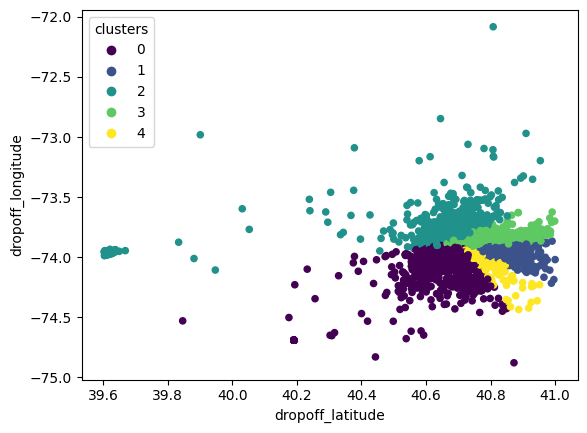

In [85]:
# ваш код здесь
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_new[['dropoff_latitude', 'dropoff_longitude']])
# print(kmeans.labels_) #список из номеров кластеров для каждого объекта обучающей выборки

sc = plt.scatter(df_new.dropoff_latitude, df_new.dropoff_longitude, c = kmeans.labels_, s=20, cmap='viridis')
plt.xlabel('dropoff_latitude')
plt.ylabel('dropoff_longitude')
plt.legend(*sc.legend_elements(), title='clusters');

### Quiz

Для каждого кластера вычислите среднюю стоимость поездки.

Чему равна самая большая средняя стоимость поездки по кластерам? Ответ округлите до целого числа.

In [86]:
# ваш код здесь
for k in range(0, 5):
    ind = np.nonzero(kmeans.labels_ == k)
    d = df_new.iloc[ind]
    print(f'Средняя стоимость поездки для кластера {k} составляет {round(d.fare_amount.mean(), 1)}')

Средняя стоимость поездки для кластера 0 составляет 12.5
Средняя стоимость поездки для кластера 1 составляет 10.3
Средняя стоимость поездки для кластера 2 составляет 40.1
Средняя стоимость поездки для кластера 3 составляет 23.9
Средняя стоимость поездки для кластера 4 составляет 9.6


Отдельно нарисуйте кластер с наибольшей средней стоимостью поездки. В нем выделяется два островка.

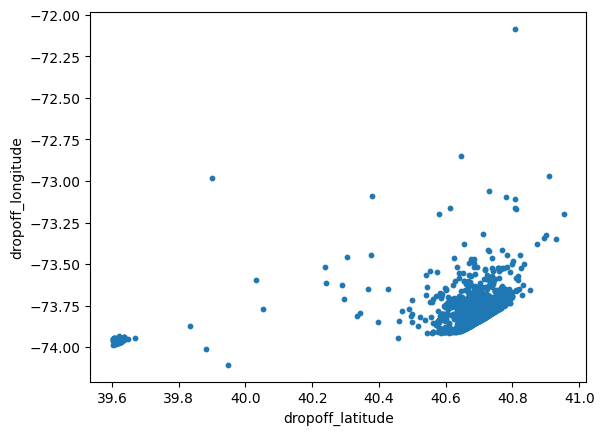

In [94]:
# ваш код здесь
ind = np.nonzero(kmeans.labels_ == 2)
d_max = df_new.iloc[ind]

sc = plt.scatter(d_max.dropoff_latitude, d_max.dropoff_longitude, s=10)
plt.xlabel('dropoff_latitude')
plt.ylabel('dropoff_longitude');

### Quiz

Кластеризуйте точки этого кластера при помощи DBSCAN с гиперпараметрами `eps`=0.15, `min_samples`=10.

Нарисуйте результат.

Вычислите координаты центра (среднее арифметрическое) меньшего кластера.

В ответе укажите `dropoff_latitude`, округленную до тысячных.

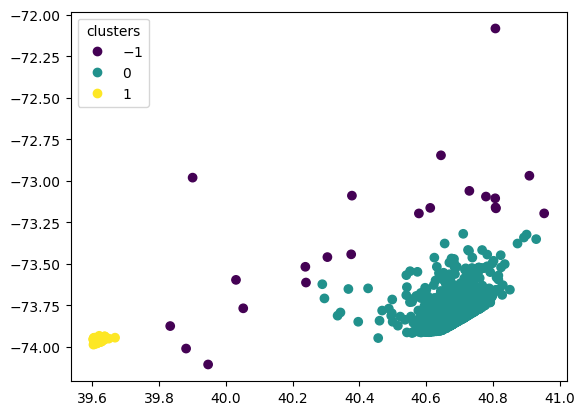

In [95]:
# ваш код здесь
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.15, min_samples=10)
clusters = dbscan.fit_predict(d_max[['dropoff_latitude', 'dropoff_longitude']])

sc = plt.scatter(d_max.dropoff_latitude, d_max.dropoff_longitude, c = clusters)
plt.legend(*sc.legend_elements(), title='clusters');

In [96]:
ind = np.nonzero(clusters == 1)
d_1 = d_max[['dropoff_latitude', 'dropoff_longitude']].iloc[ind]
d_1.mean(axis = 0)

dropoff_latitude     39.616325
dropoff_longitude   -73.960964
dtype: float64